In [1]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
import math

## Singular Value Decomposition

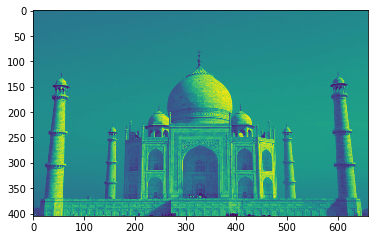

Shape : (405, 660)


In [30]:
img_path = 'data/Taj Mahal.jpg'
img = color.rgb2gray(io.imread(img_path))
plt.imshow(img)
plt.show()
print('Shape :', img.shape)

In [32]:
U, D, Vt = np.linalg.svd(img, full_matrices=False)
print('Shapes')
print('U : ', U.shape)
print('D : ', D.shape)
print('Vt : ', Vt.shape)

Shapes
U :  (405, 405)
D :  (405,)
Vt :  (405, 660)


#### CLAIM: Consider A (mxn) as m points of n dimensions each. Then v1 (the first column of V) gives direction of the line which fits those m points the best.

##### We test this claim by calculating sum of squared distances of the m points from each of the n directions given by V, and see which vi gives the least distance.

Shapes
U :  (2, 2)
D :  (2,)
Vt :  (2, 2)


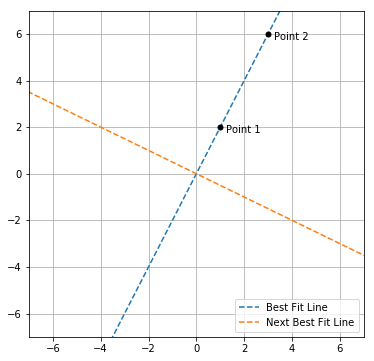

In [80]:
# Example of the 2D case
A = np.array([[1, 2], \
            [3, 6]])
U, D, Vt = np.linalg.svd(A, full_matrices=False)
print('Shapes')
print('U : ', U.shape)
print('D : ', D.shape)
print('Vt : ', Vt.shape)
v1 = Vt.T[:,0]
v2 = Vt.T[:,1]
xticks = np.linspace(-10, 10, num=21)
slope_best_line = v1[1]/v1[0]
best_line = xticks*slope_best_line
slope_next_best_line = v2[1]/v2[0]
next_best_line = xticks*slope_next_best_line
fig, ax = plt.subplots()
fig.set_size_inches((6,6))
line1 = ax.plot(xticks, best_line, '--', \
             linewidth=1.5, label='Best Fit Line')
line2 = ax.plot(xticks, next_best_line, '--', \
             linewidth=1.5, label='Next Best Fit Line')
point1 = ax.plot(A[0,0], A[0,1], marker='.', markersize=10, \
                 color='black')
ax.annotate('Point 1', xy=(1,2), xytext=(1.25, 1.75))
ax.annotate('Point 2', xy=(3,6), xytext=(3.25, 5.75))
point2 = ax.plot(A[1,0], A[1,1], marker='.', markersize=10, \
                 color='black')
_ = ax.legend(loc='lower right')
plt.grid()
_ = ax.set_xlim((-7, 7))
_ = ax.set_ylim((-7, 7))
fig.savefig('2D Example.png')

In [15]:
projection_lengths = np.matmul(img, Vt.T)
squared_sum_proj_lengths = (projection_lengths**2).sum(axis=0)
print('Sum of squared projection lengths is maximized by vector # {}' \
      .format(np.argmax(squared_sum_proj_lengths)))

Sum of squared projection lengths is maximized by vector # 0


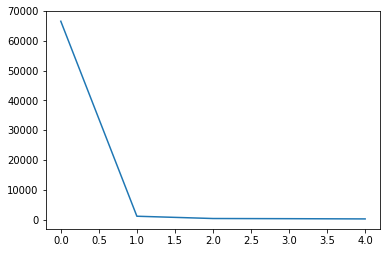

In [16]:
# Plot sum of squared distance from first 5 vi
_ = plt.plot(np.arange(5), squared_sum_proj_lengths[0:5])

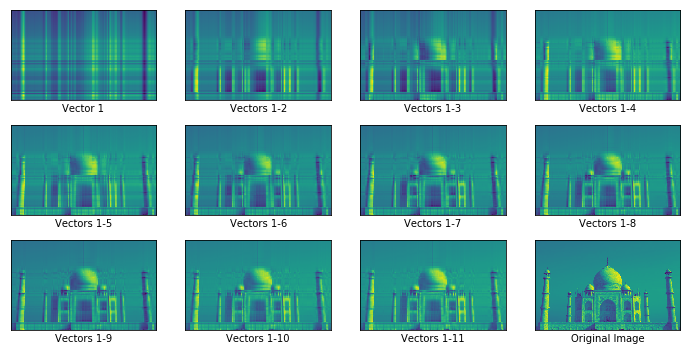

In [17]:
# Visualize the impact of adding projections on the first 11 singular vectors
frobenius = []
num_vecs = 11
num_cols = 4
num_rows = math.ceil((num_vecs + 1)/4)
f, ax = plt.subplots(num_rows, num_cols)
f.set_size_inches(3*num_cols, 2*num_rows)
projected_img = np.zeros_like(img)
for j in range(num_vecs):
    singular_vec = np.expand_dims(Vt.T[:,j], axis=1)
    proj_lengths = np.matmul(img, singular_vec)
    projected_img += np.matmul(proj_lengths, singular_vec.T)
    frobenius.append(np.sqrt(((img - projected_img)**2).sum()))
    _ = ax[j // 4, j - (j // 4)*4].imshow(projected_img)
    _ = ax[j // 4, j - (j // 4)*4].set_xticks([])
    _ = ax[j // 4, j - (j // 4)*4].set_yticks([])
    xlabel = 'Vector 1' if (j == 0) else 'Vectors 1-{}'.format(j + 1)
    _ = ax[j // 4, j - (j // 4)*4].set_xlabel(xlabel)
_ = ax[num_rows-1, num_cols-1].imshow(img)
_ = ax[num_rows-1, num_cols-1].set_xticks([])
_ = ax[num_rows-1, num_cols-1].set_yticks([])
_ = ax[num_rows-1, num_cols-1].set_xlabel('Original Image')

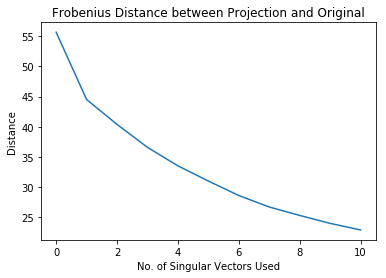

In [18]:
_ = plt.plot(np.arange(len(frobenius)), frobenius)
_ = plt.title('Frobenius Distance between Projection and Original')
_ = plt.xlabel('No. of Singular Vectors Used')
_ = plt.ylabel('Distance')